In [21]:
# This notebook analyses the ouput of 
# running complexity.py

# grep 'for_parser:' complexity_PM.txt | sed 's/for_parser:,//g' | sed '1 i\cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac, CSR_PM_count'
# The above shell must be run and saved to PM.csv

In [22]:
import sys

sys.path.append("../")
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

In [23]:
import pandas as pd
df = pd.read_csv("PM.csv")
df.head()

,cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count
0,london,1,1,45,500,800,200,0.01500,12
1,london,2,1,45,500,800,200,0.01375,11
2,london,3,1,45,500,800,200,0.01625,13
3,london,4,1,45,500,800,200,0.01375,11
4,london,5,1,45,500,800,200,0.00500,4


cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : london 45 1 1 (3, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : madrid 45 1 1 (3, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 5 1 1 (0, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 25 1 1 (0, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 45 1 1 (2, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 65 1 1 (0, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 85 1 1 (0, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 105 1 1 (0, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 125 1 1 (0, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 145 1 1 (0, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 165 1 1 (0, 9)
cityname, scale, i_o_length, pred_horiz, filte

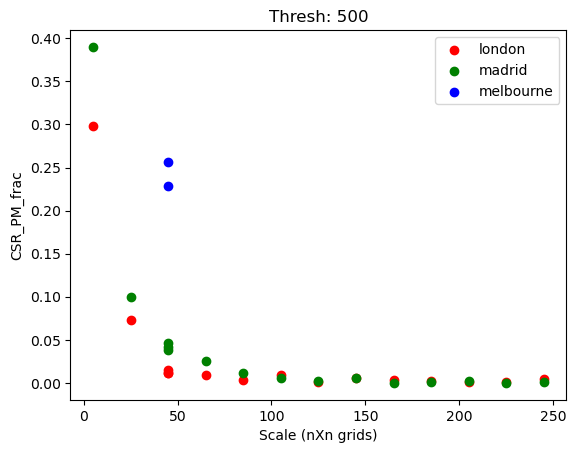

cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : london 45 1 1 (3, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : madrid 45 1 1 (3, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 45 1 1 (3, 9)


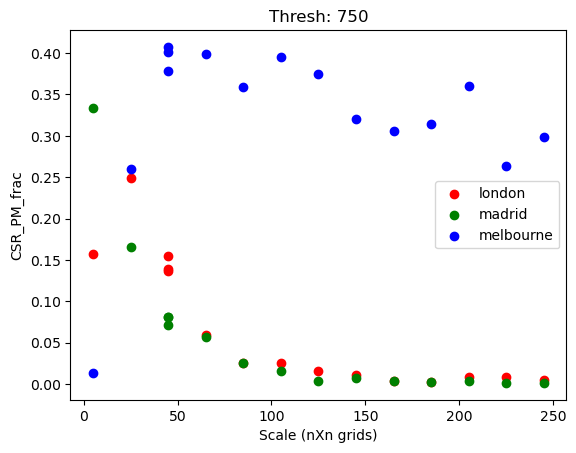

cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : london 45 1 1 (3, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : madrid 45 1 1 (3, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 45 1 1 (3, 9)


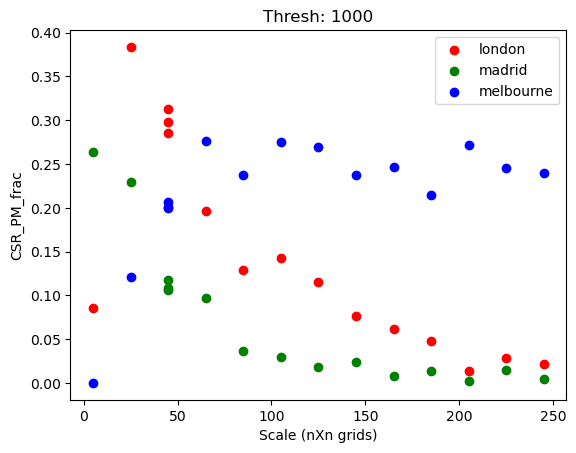

cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : london 45 1 1 (3, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : madrid 45 1 1 (3, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 45 1 1 (3, 9)


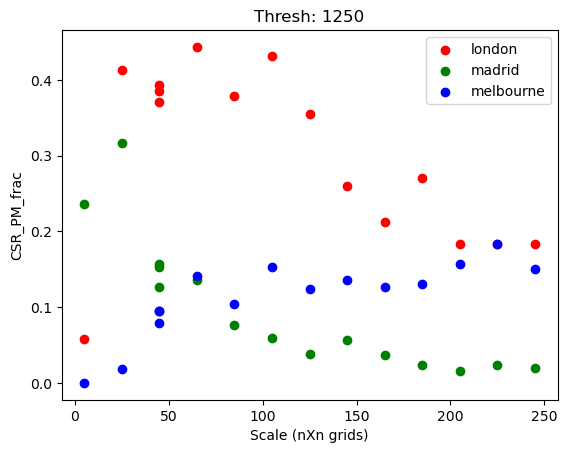

cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : london 45 1 1 (3, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : madrid 45 1 1 (3, 9)
cityname, scale, i_o_length, pred_horiz, filtered_rows.shape : melbourne 45 1 1 (3, 9)


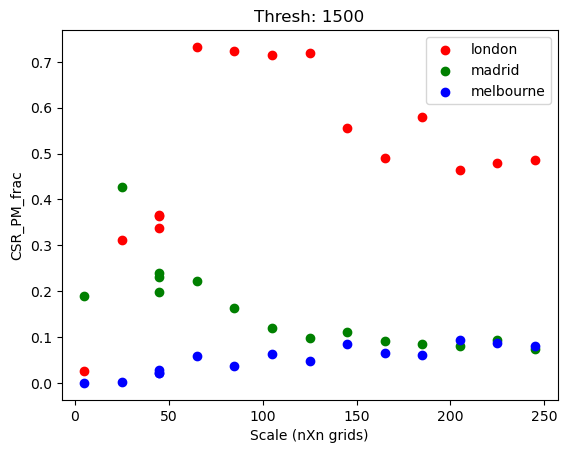

In [52]:
thresh = 1500

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

# scales
for thresh in [500, 750, 1000, 1250, 1500]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_frac, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_frac, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_frac")
    plt.legend()
    plt.show()
                    
                
    # io_lengths
#     for scale in config.scales_def:
#         for i_o_length in config.i_o_lengths:
#             for pred_horiz in config.pred_horiz_def:
                

#     # pred_horiz
#     for scale in config.scales_def:
#         for i_o_length in config.i_o_lengths_def:
#             for pred_horiz in config.pred_horiz:
                

In [18]:
filtered_rows.

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size', 'thresh',
       'cx_sample_whole_data', 'cx_sample_single_point', 'CSR_PM_frac',
       ' CSR_PM_count'],
      dtype='object')